In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img
from skimage.filters import threshold_otsu

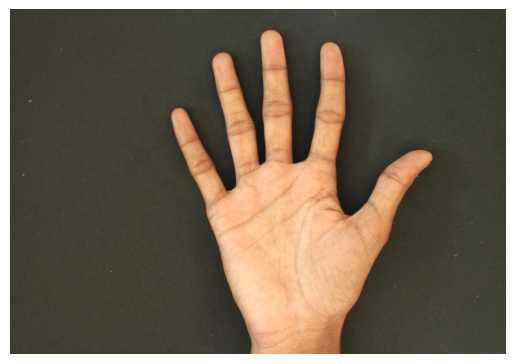

In [3]:
# Load & Show Image
image = img.imread("img/hand_1.jpg")
image_2 = cv2.imread('img/hand_1.jpg')
plt.imshow(image.astype(np.uint8), cmap='gray')
plt.axis('off')
plt.show()

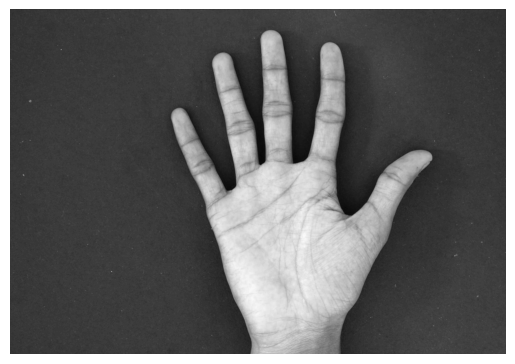

In [4]:
# Gray Conversion
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image.astype(np.uint8), cmap='gray')
plt.axis('off')
plt.show()

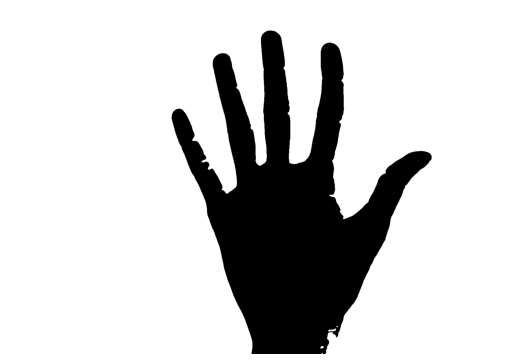

In [5]:
# Gaussian Blur & Otsu Threshold
gaussian_blur = cv2.GaussianBlur(gray_image,(11, 11), 5)
thresh = threshold_otsu(gaussian_blur)
otsu_image = gaussian_blur < thresh
plt.imshow(otsu_image.astype(np.uint8), cmap='gray')
plt.axis('off')
plt.show()

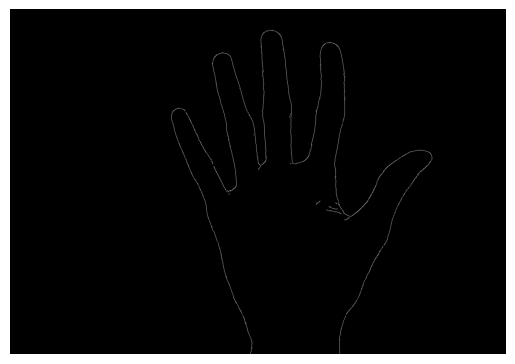

In [6]:
# Canny Edge Algorithm
canny_edge = cv2.Canny(gaussian_blur, 30, 60)
plt.imshow(canny_edge.astype(np.uint8), cmap='gray')
plt.axis('off')
plt.show()

keypoint coordinate 0 : (982.0, 533.0)
keypoint coordinate 1 : (1172.0, 1059.0)
keypoint coordinate 2 : (766.800048828125, 632.4000244140625)
keypoint coordinate 3 : (862.800048828125, 519.6000366210938)
keypoint coordinate 4 : (862.56005859375, 519.8400268554688)
keypoint coordinate 5 : (1078.2720947265625, 162.43202209472656)
keypoint coordinate 6 : (862.6177368164062, 520.4736938476562)
keypoint coordinate 7 : (1067.489501953125, 674.3348999023438)
keypoint coordinate 8 : (1065.99658203125, 674.8325805664062)


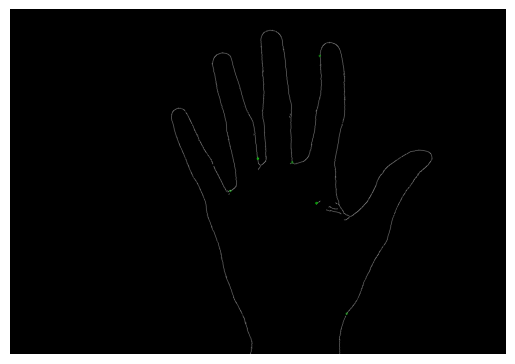

In [7]:
# Keypoint detection with ORB
orb = cv2.ORB.create(9)
kp = orb.detect(canny_edge, None)
for i in range(len(kp)):
    print(f"keypoint coordinate {i} : {kp[i].pt}")
kp, des = orb.compute(canny_edge, kp)


keypoint_image = cv2.drawKeypoints(canny_edge, kp, None, color=(0, 255, 0), flags=0)
plt.imshow(keypoint_image.astype(np.uint8), cmap='gray')
plt.axis('off')
plt.show()

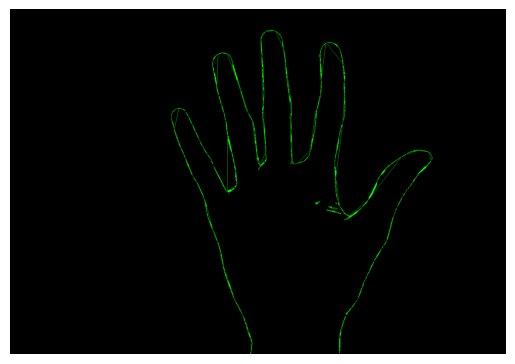

In [20]:
# Convex Hull
contours, hierarchy = cv2.findContours(canny_edge, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
hull = []

for contour in contours:
    hull = cv2.convexHull(contour)
    convex_hull = cv2.drawContours(keypoint_image, [hull], -1, (0, 255, 0), 4)

plt.imshow(convex_hull.astype(np.uint8), cmap='gray')
plt.axis('off')
plt.show()